Action2	
对移动推荐系统进行可视化数据探索
数据集https://tianchi.aliyun.com/competition/entrance/231522/information
tianchi_fresh_comp_train_item.csv
tianchi_fresh_comp_train_user.csv
比如时间规律统计，4种行为类别的对比…		
1、完成代码（20points）
2、结果正确（20points）

In [ ]:
import pandas as pd
#数据加载
df = pd.read_csv('./tianchi_fresh_comp_train_user.csv')

In [9]:
print(df.head())
print(df)

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  
           user_id    item_id  behavior_type user_geohash  item_category  \
0         10001082  285259775              1      97lk14c           4076   
1         10001082    4368907              1          NaN           5503   
2         10001082    4368907              1          NaN           5503   
3         10001082   53616768              1          NaN           9762   
4         10001082  151466952              1          NaN           5232   
...            

In [8]:
#计算CVR
#print(df['behavior_type'].value_counts())
count_all, count_4=0,0
count_user = df['behavior_type'].value_counts()
count_all = count_user[1]+count_user[2]+count_user[3]+count_user[4]
count_4+= count_user[4]

cvr=count_4/count_all
print('CVR={}%'.format(cvr*100))

CVR=0.9985776926023916%


In [10]:
#将Time字段转化为pandas中的datetime类型
df['time']=pd.to_datetime(df['time'])
df.index = df['time']
print(df.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  


In [35]:
from collections import defaultdict
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
#时间规律统计
def show_count_day(df):
    count_day = defaultdict(int)
    #2014-11-18~2014-12-18
    str1 = '2014-11-17'
    temp_date = datetime.strptime(str1, '%Y-%m-%d')
    delta =timedelta(days=1)
    for i in range(31):
        temp_date =temp_date +delta
        #将实际转化为字符串类型
        temp_str = temp_date.strftime('%Y-%m-%d')
        #df的index为时间
        count_day[temp_str] += df[temp_str].shape[0]
    print(count_day)
    #绘制
    df_count_day = pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [18]:
#属于商品子集P的操作次数
df_p = pd.read_csv('./tianchi_fresh_comp_train_item.csv')

In [47]:
print(df_p)

          item_id item_geohash  item_category
0       100002303          NaN           3368
1       100003592          NaN           7995
2       100006838          NaN          12630
3       100008089          NaN           7791
4       100012750          NaN           9614
...           ...          ...            ...
620913   99994679          NaN           9205
620914   99995241          NaN            597
620915   99998434          NaN           8099
620916   99998861          NaN          12553
620917   99999855          NaN           3900

[620918 rows x 3 columns]


In [ ]:
#df = pd.merge(df.reset_index(),df_p,on=['item_id']).set_index('tiem')
df = pd.merge(df, df_p, on=['item_id']).set_index('time')

In [48]:
print(df)

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-03 01:00:00  10001082  275221686              1          NaN   
2014-12-13 14:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 00:00:00  10001082  275221686              1          NaN   
...                       ...        ...            ...          ...   
2014-11-21 17:00:00  65328951  301257355              1          NaN   
2014-11-21 17:00:00  65328951  293960914              1          NaN   
2014-11-21 17:00:00  65328951  293960914              1          NaN   
2014-11-21 17:00:00  65328951  293960914              1          NaN   
2014-12-13 11:00:00  65341491   16100581              1      95qqqin   

                     item_category_x item_geohash  item_categor

defaultdict(<class 'int'>, {'2014-11-18': 86732, '2014-11-19': 94513, '2014-11-20': 90008, '2014-11-21': 81061, '2014-11-22': 121133, '2014-11-23': 157253, '2014-11-24': 113969, '2014-11-25': 106101, '2014-11-26': 103857, '2014-11-27': 91260, '2014-11-28': 135652, '2014-11-29': 127997, '2014-11-30': 117067, '2014-12-01': 104922, '2014-12-02': 134609, '2014-12-03': 144284, '2014-12-04': 103145, '2014-12-05': 114820, '2014-12-06': 138450, '2014-12-07': 129833, '2014-12-08': 157222, '2014-12-09': 204471, '2014-12-10': 149494, '2014-12-11': 225812, '2014-12-12': 422308, '2014-12-13': 120220, '2014-12-14': 130784, '2014-12-15': 156657, '2014-12-16': 130437, '2014-12-17': 155796, '2014-12-18': 130095})


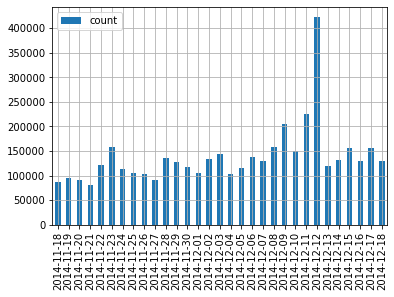

In [49]:
show_count_day(df)

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


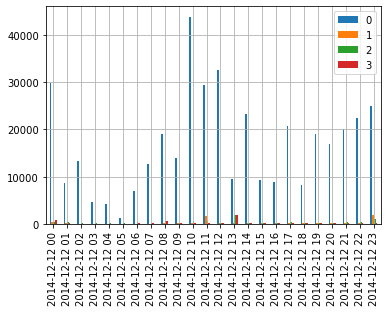

In [60]:
#基于小时的统计
def show_count_hour(datel):
    count_hour = {}
    #设置初始值
    for i in range(24):
        time_str = datel + ' %02.d'%i
        #print(time_str)
        count_hour[time_str] = [0, 0, 0, 0]
        temp = df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]] 
    print(count_hour)
    #从字典类型生成DataFrame
    df_count_hour = pd.DataFrame.from_dict(count_hour,orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
show_count_hour('2014-12-12')